In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix,log_loss

In [228]:
df=pd.read_csv("train.csv",index_col="id")
df_test=pd.read_csv("test.csv", index_col="id")

In [229]:
df

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1


In [230]:
df.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [231]:
df.duplicated().any()

False

In [232]:
df.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [233]:
df.shape

(2190, 12)

In [234]:
df["rainfall"].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

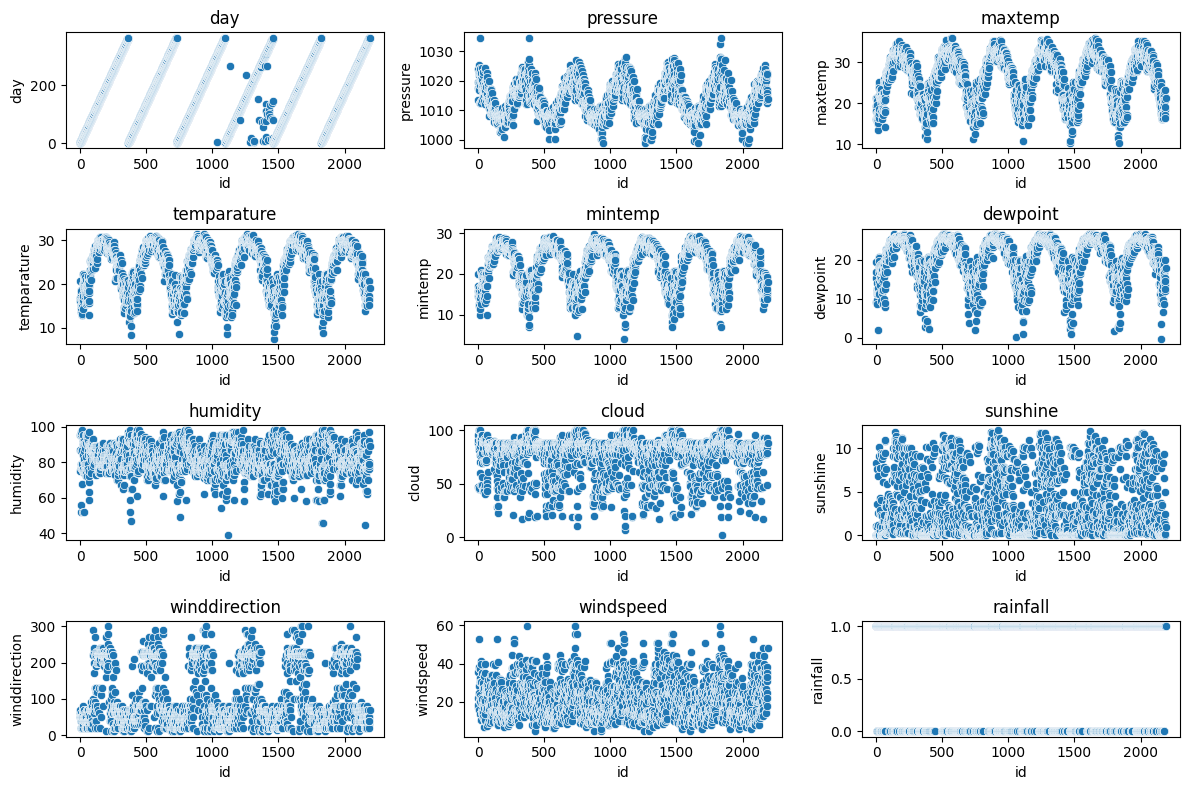

In [235]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(df.columns, 1): 
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df.index, y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [236]:
df.skew()

day              0.030615
pressure         0.284062
maxtemp         -0.490890
temparature     -0.557471
mintemp         -0.649179
dewpoint        -0.997889
humidity        -0.561541
cloud           -1.339274
sunshine         0.639871
winddirection    0.708063
windspeed        0.769390
rainfall        -1.176743
dtype: float64

In [237]:
df["day"].value_counts()

day
91     7
144    7
267    7
140    7
111    7
      ..
157    5
286    5
38     5
336    5
365    5
Name: count, Length: 365, dtype: int64

In [238]:
X=df.drop(columns="rainfall")
y=df["rainfall"]

In [239]:
X_train,X_val, y_train,y_val=train_test_split(X,y, test_size=0.2, random_state=42)

In [240]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
df_test=scaler.transform(df_test)

In [241]:
X_train

array([[-1.72635456e-01, -1.25857739e+00,  8.33602986e-01, ...,
         2.43616427e-01,  1.45029573e+00, -7.97332405e-01],
       [-1.25202860e+00,  1.06326990e-03, -7.10987488e-01, ...,
        -1.03037845e+00, -8.04293338e-01, -9.47563234e-01],
       [ 8.59415878e-01,  5.86530055e-01,  4.96278630e-01, ...,
         1.35143806e+00, -3.03273544e-01,  1.74657630e+00],
       ...,
       [-1.37511729e+00,  5.86530055e-01, -6.93233574e-01, ...,
         1.07448265e+00, -8.04293338e-01, -1.05773251e+00],
       [ 1.77693896e-01, -7.26334858e-01,  1.36622039e+00, ...,
         8.52918324e-01,  1.07453089e+00, -1.39825572e+00],
       [-4.75623004e-01, -1.09890463e+00,  1.01114212e+00, ...,
         6.86745080e-01,  1.45029573e+00,  3.14375731e-01]])

In [242]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score, Confusion Matrix
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    conf_matrix = confusion_matrix(true,predicted) 
    return acc, f1 , precision, recall, roc_auc,conf_matrix

In [243]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''

    log_loss_list=[]
    f1_score_list=[]
    roc_auc_score_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        y_val_pred_proba = model.predict_proba(X_val)[:,1]

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score, model_train_conf_matrix=evaluate_clf(y_train ,y_train_pred)


        # Validation set performance
        model_val_accuracy,model_val_f1,model_val_precision,\
        model_val_recall,model_val_rocauc_score,model_val_conf_matrix=evaluate_clf(y_val, y_val_pred)
        model_val_log_loss=log_loss(y_val,y_val_pred_proba) #probability estimates for positive class

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print('- Confusion Matrix:\n', model_train_conf_matrix)

        print('----------------------------------')

        print('Model performance for Validation set')
        print('- Accuracy: {:.4f}'.format(model_val_accuracy))
        print('- F1 score: {:.4f}'.format(model_val_f1))
        print('- Precision: {:.4f}'.format(model_val_precision))
        print('- Recall: {:.4f}'.format(model_val_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_val_rocauc_score))
        print('- Confusion Matrix:\n', model_val_conf_matrix)
        log_loss_list.append(model_val_log_loss)
        f1_score_list.append(model_val_f1)
        roc_auc_score_list.append(model_val_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, f1_score_list, roc_auc_score_list,log_loss_list)), columns=['Model Name', 'F1_score', 'ROC-AUC_Score','Log_loss']).sort_values(by='ROC-AUC_Score', ascending=False)
        
    return report

In [244]:
models = {
    "SVM Classifier": SVC(probability=True, random_state=42, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "XGBClassifier": XGBClassifier(objective="binary:logistic", eval_metric="logloss"),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False)
}

In [245]:
report_res = evaluate_models(X_train, y_train, models)

SVM Classifier
Model performance for Training set
- Accuracy: 0.8607
- F1 score: 0.9051
- Precision: 0.9387
- Recall: 0.8738
- Roc Auc Score: 0.8466
- Confusion Matrix:
 [[ 345   76]
 [ 168 1163]]
----------------------------------
Model performance for Validation set
- Accuracy: 0.8174
- F1 score: 0.8726
- Precision: 0.8867
- Recall: 0.8589
- Roc Auc Score: 0.7824
- Confusion Matrix:
 [[ 84  35]
 [ 45 274]]


RandomForest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
- Confusion Matrix:
 [[ 421    0]
 [   0 1331]]
----------------------------------
Model performance for Validation set
- Accuracy: 0.8539
- F1 score: 0.9045
- Precision: 0.8632
- Recall: 0.9498
- Roc Auc Score: 0.7732
- Confusion Matrix:
 [[ 71  48]
 [ 16 303]]


GradientBoosting
Model performance for Training set
- Accuracy: 0.9572
- F1 score: 0.9723
- Precision: 0.9577
- Recall: 0.9872
- Roc Auc Score: 0.9247
- Confusion Matrix:
 [[

In [246]:
report_res

,Model Name,F1_score,ROC-AUC_Score,Log_loss
2,GradientBoosting,0.901366,0.784845,0.411551
3,Logistic Regression,0.905263,0.782711,0.379860
0,SVM Classifier,0.872611,0.782408,0.399025
6,CatBoosting Classifier,0.903614,0.781144,0.395990
1,RandomForest,0.904478,0.773241,0.402099
4,XGBClassifier,0.895928,0.768038,0.531667
5,LightGBM,0.894895,0.761202,0.496831


In [247]:
svm_model=SVC(kernel='linear', probability=True, random_state=42, class_weight="balanced")
rf_model=RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")

In [248]:
svm_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [249]:
y_pred_svm=svm_model.predict(X_val)
y_pred_rf=rf_model.predict(X_val)

In [250]:
# Calculate Evaluation Metrics
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm) 
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)

In [251]:
# Calculate Evaluation Metrics
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf) 
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)

In [252]:
# Display Results
print(f"Accuracy_svm: {accuracy_svm:.2f}")
print(f"Precision_svm: {precision_svm:.2f}")
print(f"Recall_svm: {recall_svm:.2f}")
print(f"F1 Score_svm: {f1_svm:.2f}")

print("\nConfusion Matrix SVM:")
print(conf_matrix_svm)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_svm))

# Display Results
print(f"Accuracy_rf: {accuracy_rf:.2f}")
print(f"Precision_rf: {precision_rf:.2f}")
print(f"Recall_rf: {recall_rf:.2f}")
print(f"F1 Score_rf: {f1_rf:.2f}")

print("\nConfusion Matrix RF:")
print(conf_matrix_rf)

print("\nClassification Report:")
print(classification_report(y_val, y_pred_rf))

Accuracy_svm: 0.83
Precision_svm: 0.89
Recall_svm: 0.87
F1 Score_svm: 0.88

Confusion Matrix SVM:
[[ 83  36]
 [ 40 279]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       119
           1       0.89      0.87      0.88       319

    accuracy                           0.83       438
   macro avg       0.78      0.79      0.78       438
weighted avg       0.83      0.83      0.83       438

Accuracy_rf: 0.85
Precision_rf: 0.86
Recall_rf: 0.95
F1 Score_rf: 0.90

Confusion Matrix RF:
[[ 71  48]
 [ 16 303]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       119
           1       0.86      0.95      0.90       319

    accuracy                           0.85       438
   macro avg       0.84      0.77      0.80       438
weighted avg       0.85      0.85      0.85       438



In [253]:
y_pred_test_rf= rf_model.predict(df_test)
y_pred_test_svm= svm_model.predict(df_test)

In [254]:
y_pred_test_svm.shape

(730,)

In [255]:
submission=pd.read_csv("sample_submission.csv", index_col="id")

In [256]:
submission["rainfall"]=y_pred_test_svm

In [257]:
submission

,rainfall
id,
2190,1
2191,1
2192,1
2193,0
2194,0
...,...
2915,1
2916,1
2917,1


In [258]:
submission.to_csv("svm_prediction_1.csv")

In [259]:
submission["rainfall"]=y_pred_test_rf

In [260]:
submission.to_csv("rf_prediction_1.csv")